In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

### 前処理

In [3]:
# yearカラムの修正
train['year'] = train['year'].apply(lambda x: x if x <= 2023 else x - 1000)
test['year'] = test['year'].apply(lambda x: x if x <= 2023 else x - 1000)

# odometerカラムの修正
train = train[train['odometer'] >= 0]
test = test[test['odometer'] >= 0]

### データの分割

In [4]:
#priceは予測対象で学習に必要なため別途targetの変数に格納する
target = train["price"]
#学習させる特徴以外を削除（yearはpriceと相関がないので含めない）
train = train.drop(columns=['id', 'region', 'state', 'year','manufacturer', 'condition','cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', "price"], axis=1)
test = test.drop(columns=['id', 'region', 'state', 'year', 'manufacturer', 'condition','cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color'], axis=1)

In [5]:
train.head()

,odometer
0,115148
1,172038
2,152492
3,104118
4,144554


In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(train, target, random_state = 82)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(20450, 1) (6817, 1) (20450,) (6817,)


### 学習と検証

In [7]:
# 予測モデルの試行
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    mse = mean_squared_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)
    print(f"{model.__class__.__name__}:")
    print(f"   Mean Squared Error: {mse}")
    print(f"   R^2 Score: {r2}")
    print()

LinearRegression:
   Mean Squared Error: 105283571.82461123
   R^2 Score: 0.0719160376718273

DecisionTreeRegressor:
   Mean Squared Error: 186446118.3619393
   R^2 Score: -0.643538961409045

RandomForestRegressor:
   Mean Squared Error: 139952622.86075366
   R^2 Score: -0.23369470195411735



In [8]:
#線形回帰で学習
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
#予測
pred = model.predict(X_valid)

In [10]:
#評価
score = mean_absolute_percentage_error(y_valid, pred)
print(score*100)

96.59614433832535


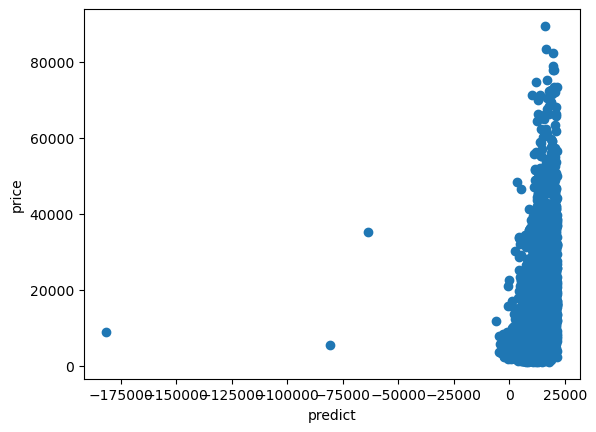

In [11]:
#横軸が予測結果、縦軸が正解価格
plt.scatter(pred, y_valid)
plt.xlabel("predict")
plt.ylabel("price")
plt.show()